# Homework

In this homework assignment, you will train a handwritten digit classification model on Tensorflow.

An important additional requirement will be saving the checkpoints to your Google drive. This will come in handy later on when training more complex models, in case data is lost when Colab unexpectedly shuts down.

In [1]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense

 #tf.enable_eager_execution()

2.9.2


In [2]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Loading data

11490434/11490434 [==============================] - 0s 0us/step


(60000, 784)

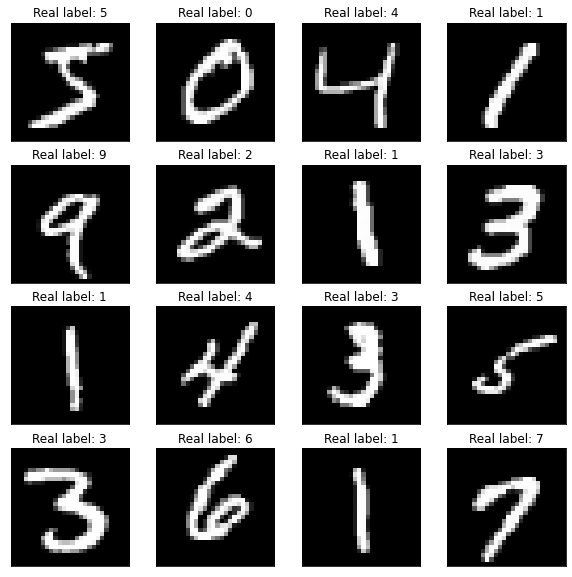

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))
x_train.shape

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path = Path("/content/drive/My Drive/Tensorflow/model_1")
path.mkdir(exist_ok=True, parents=True)
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


And you implement all the code below yourself! 
Model requirements:
1. Accuracy on the test part of the sample> 96%
2. The checkpoint of the model with the best parameters should be saved on your Google drive
3. The history object, which is obtained from model.fit(...) must contain the values ​​of loss and accuracy for the train and test

In [6]:
def get_compiled_model():
  model = tf.keras.Sequential()
  model.add(Dense(128, input_dim=784, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  model.compile(loss=loss, optimizer=optimizer, metrics=['acc'])
  return model

model = get_compiled_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=196, verbose=1, callbacks=[checkpoint])


Epoch 1/150
299/307 [============================>.] - ETA: 0s - loss: 0.2318 - acc: 0.9298
Epoch 1: val_acc improved from -inf to 0.96020, saving model to /content/drive/My Drive/Tensorflow/model_1/best_checkpoint.hdf5
307/307 [==============================] - 4s 9ms/step - loss: 0.2294 - acc: 0.9305 - val_loss: 0.1322 - val_acc: 0.9602
Epoch 2/150
303/307 [============================>.] - ETA: 0s - loss: 0.1053 - acc: 0.9681
Epoch 2: val_acc improved from 0.96020 to 0.97100, saving model to /content/drive/My Drive/Tensorflow/model_1/best_checkpoint.hdf5
307/307 [==============================] - 2s 7ms/step - loss: 0.1053 - acc: 0.9681 - val_loss: 0.0979 - val_acc: 0.9710
Epoch 3/150
299/307 [============================>.] - ETA: 0s - loss: 0.0788 - acc: 0.9756
Epoch 3: val_acc improved from 0.97100 to 0.97130, saving model to /content/drive/My Drive/Tensorflow/model_1/best_checkpoint.hdf5
307/307 [==============================] - 2s 6ms/step - loss: 0.0790 - acc: 0.9755 - val_lo

In [7]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Let's look at the training plots:

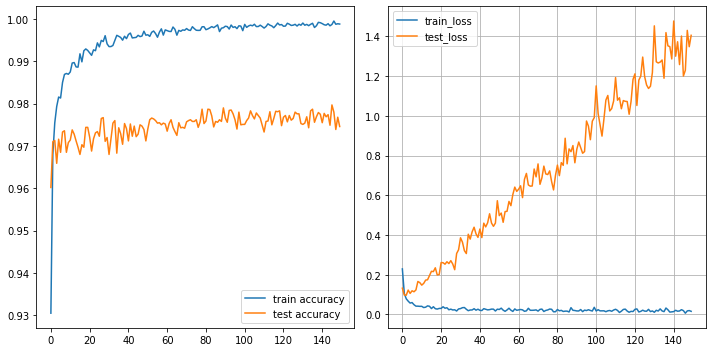

In [8]:
show_progress(history.history)

Now let's move on to loading the model. If everything is implemented correctly, then the code below should work without errors:

In [9]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 1s 2ms/step - loss: 1.2007 - acc: 0.9797
Accuracy of restored model 97.97%


And finally, you can compare predictions with real classes (it will be difficult to find an error with such accuracy):

313/313 [==============================] - 1s 3ms/step


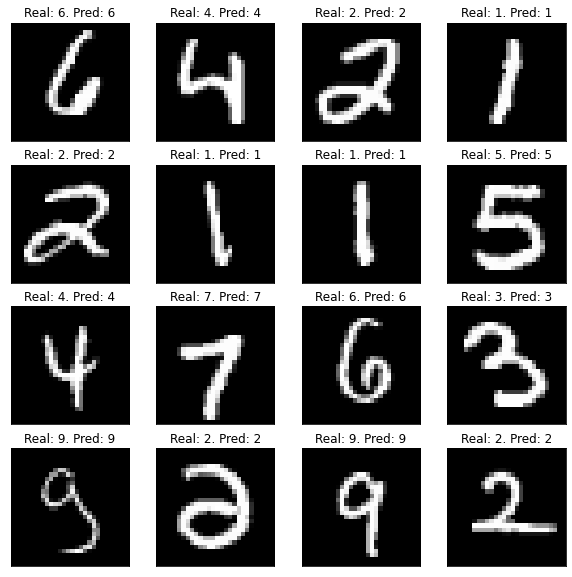

In [12]:
predict_x=restored_model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
# predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], classes_x[idxs])